## Machine Learning on Bank Marketing Dataset

+ Nama : Shafira Almaisa

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dilakukan import library agar dapat digunakan fungsi-fungsi yang diperlukan.

In [2]:
# read data
df_bank = pd.read_csv('dataset/bank-full.csv')

dilakukan read data dari file csv yang kemudian disimpan dalam variabel baru.

#### Preprocessing Data

In [3]:
# show top 5 data
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


code ini digunakan untuk menampilkan 5 data teratas, bisa untuk melihat value data secara sekilas.

In [4]:
# showing numeric statistical information
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Code di atas digunakan untuk melihat informasi statistik dari data terkhusus untuk data dengan value numerik.

In [5]:
# showing categoric statistical information
df_bank.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Code di atas digunakan untuk melihat informasi statistik dari data terkhusus untuk data dengan value kategorik.

In [6]:
# showing info of the dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


kode ini digunakan untuk melihat informasi dari dataset, seperti nama kolom, null dan tipe datanya.

In [7]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Kode di atas untuk melihat jumlah null pada data. Jumlah tersebut akan dihitung per kolom. Untuk hasilnya bisa dilihat pada output bahwa tidak ditemukan null pada data.

#### Visualisasi Data

In [8]:
# group by data untuk melihat jumlah data untuk masing-masing class
df_y = df_bank.groupby(['y'])[['y']].count()
df_y

,y
y,
no,39922
yes,5289


Kode ini digunakan untuk melakukan group by data berdasarkan label (yes atau no) dimana tujuannya untuk melihat perbandingan jumlah data untuk masing-masing class dan bisa kita lihat dari outputnya bahwa ada perbedaan yang sangat jauh antar keduanya (imbalanced).

In [9]:
# rename nama kolom
df_y.rename(columns={'y':'Class'}, inplace=True)
df_y.head()

,Class
y,
no,39922
yes,5289


Dilakukan perbahan nama kolom agar lebih mudah dimengerti nantinya.

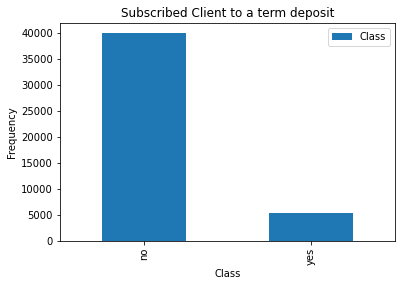

In [10]:
# membangun bar plot untuk kolom y untuk mengecek data imbalanced atau tidak
df_y.plot(kind='bar')

plt.title('Subscribed Client to a term deposit')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

Di atas merupakan bar plot yang menampilkan frekuensi untuk masing-masing class. Jika dilihat, perbedaan frekuensi antara class yes dan no cukup besar jadi dapat dikatakan data ini bersifat imbalanced.

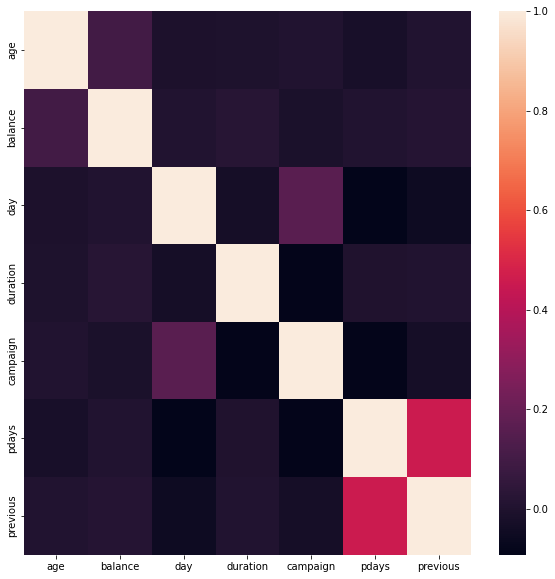

In [11]:
# membuat df baru untuk membangun heatmap
df_heat = df_bank.drop('y', axis=1)

# membangun heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(10, 10))

sns.heatmap(df_heat.corr())

plt.show()

Dari heatmap di atas, dapat diketahui bahwa variabel pdays dan previous memiliki tingkat kolerasi yang tinggi, dengan kata lain kenaikan atau penurunan value dari suatu variabel diikuti oleh perubahan dari value variabel lainnya. Selain itu, terdapat variabel campaign dan day yang memiliki tingkat kolerasi yang lumayan tinggi dibandingkan yang lainnya.

In [12]:
# menampilkan data teratas
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


code ini digunakan untuk menampilkan data teratas, bisa untuk melihat value data secara sekilas.

In [13]:
# import library
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

dilakukan import library agar dapat digunakan fungsi-fungsi yang diperlukan.

#### Logistic Regression

In [14]:
# extract feature and label
X = df_bank[['age', 'balance', 'duration']]
y = df_bank['y']

diassign kolom age, balance dan duration ke variable X sebagai data features dan kolom y diassign ke variabel y sebagai data label atau target variabel.

In [15]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

Dilakukan splitting data dari data sebelumnya dengan ukuran 20% data awal untuk testing set dan selebihnya untuk training set.

In [16]:
from sklearn.linear_model import LogisticRegression

dilakukan import library agar dapat digunakan fungsi-fungsi yang diperlukan.

In [17]:
# bangun model
model_LR = LogisticRegression(C=0.05, random_state=2024, solver = 'liblinear', multi_class='ovr')

# fit model
model_LR.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

dibangun sebuah model Logistic Regression yang kemudian difit menggunakan data training agar model bisa belajar untuk melakukan prediksi ke depannya.

In [18]:
# mengecek model overfitting atau tidak serta score dari model
print('Score data training', model_LR.score(x_train, y_train))
print('Score data testing',model_LR.score(x_test, y_test))

Score data training 0.8887414288874143
Score data testing 0.8889748977109366


Score menunjukkan model cukup baik untuk prediksi, dan karena selisih score tidak terlalu jauh antara penggunaan data training dan data testing maka diputuskan bahwa model ini tidak overfitting.

In [19]:
# predict the given features
y_pred = model_LR.predict(x_test)

# show confusion matrix
confusion_matrix(y_test, y_pred)

array([[7862,  120],
       [ 884,  177]], dtype=int64)

Setelah dilakukan prediksi menggunakan data testing, dilihat confusion matrixnya. Jika dilihat dari confusion matrix si atas, ada 7862 True Negative, 177 True Positif, 120 False Positive dan 884 False Negatve.

Kemudian dilakukan penambahan variabel(label encoding untuk loan dan job)

In [20]:
# build label encoder
le = preprocessing.LabelEncoder()

Dibangun model linear regression.

In [21]:
# lakukan label encode pada loan dan job
loan_enc = le.fit_transform(df_bank['loan'])
job_enc = le.fit_transform(df_bank['job'])

Dilakukan label encode, diubah nilai dari kategorik menjadi numerik agar bisa digunakan untuk model.

In [22]:
# zip hasil encode kolom loan dan job
X1 = list(zip(loan_enc, job_enc))

dua data baru tadi digabungkan menjadi satu.

In [23]:
# ubah menjadi format Data Frame
features = pd.DataFrame(X1)

data tadi dirubah menjadi format data frame agar bisa digabungkan dengan data awal.

In [24]:
# gabungkan ke df awal
X = X.join(features)
X

,age,balance,duration,0,1
0,58,2143,261,0,4
1,44,29,151,0,9
2,33,2,76,1,2
3,47,1506,92,0,1
4,33,1,198,0,11
...,...,...,...,...,...
45206,51,825,977,0,9
45207,71,1729,456,0,5
45208,72,5715,1127,0,5
45209,57,668,508,0,1


Kemudian data features baru digabungkan dengan data features awal.

In [25]:
# ubah nama kolom
X.rename(columns={0:'loan_enc', 1:'job_enc'}, inplace=True)
X

,age,balance,duration,loan_enc,job_enc
0,58,2143,261,0,4
1,44,29,151,0,9
2,33,2,76,1,2
3,47,1506,92,0,1
4,33,1,198,0,11
...,...,...,...,...,...
45206,51,825,977,0,9
45207,71,1729,456,0,5
45208,72,5715,1127,0,5
45209,57,668,508,0,1


Dilakukan rename kolom agar lebih mudah dimengerti.

In [26]:
# Split data baru
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

Dilakukan splitting data dari data sebelumnya dengan ukuran 20% data awal untuk testing set dan selebihnya untuk training set.

In [27]:
# fit dengan data baru
model_LR.fit(x_train, y_train)

# cek score model dengan data baru
print('Score data training', model_LR.score(x_train, y_train))
print('Score data testing',model_LR.score(x_test, y_test))

Score data training 0.8884096438840965
Score data testing 0.8893066460245493


Dilakukan fitting model agar model dapat belajar untuk melakukan prediksi nantinya. Lalu dicek score model menggunakan data testing dan training, selain untuk mengecek akurasi digunakan juga untuk membandingkan score untuk pertimbangan model tersebut overfitting atau tidak.

In [28]:
# predict the given features dengan data baru
y_pred = model_LR.predict(x_test)

# show confusion matrix
confusion_matrix(y_test, y_pred)

array([[7859,  123],
       [ 878,  183]], dtype=int64)

Jika dilihat pada hasil score dan confusion matrix, bisa dipastikan performance model menurut karena nilai score yang menurun serta semakin menurunnya kemampuan model dalam mem-predict data. Jika dilihat dari confusion matrix di atas, terjadi penurunan untuk angka True Negatif dan True Positif serta kenaikan pada False positif.

Kemudian dilakukan percobaan penambahan feature marital dan housing

In [29]:
# encode variable
marit_enc = le.fit_transform(df_bank['marital'])
housing_enc = le.fit_transform(df_bank['housing'])

# zip kedua hasil encoding
X2 = list(zip(marit_enc, housing_enc))

# ubah menjadi data frame dan digabungkan dengan data awal
features2 = pd.DataFrame(X2)
X = X.join(features2)
X

,age,balance,duration,loan_enc,job_enc,0,1
0,58,2143,261,0,4,1,1
1,44,29,151,0,9,2,1
2,33,2,76,1,2,1,1
3,47,1506,92,0,1,1,1
4,33,1,198,0,11,2,0
...,...,...,...,...,...,...,...
45206,51,825,977,0,9,1,0
45207,71,1729,456,0,5,0,0
45208,72,5715,1127,0,5,1,0
45209,57,668,508,0,1,1,0


diakses data marital dan housing kemudian dilakukan encoding dan diassign ke variabel baru. Kemudian kedua kolom baru dari marital dan housing tersebut disatukan, diubah ke dalam bentuk data frame dan digabungkan dengan data awal.

In [30]:
# ubah nama kolom
X.rename(columns={0:'marit_enc', 1:'housing_enc'}, inplace=True)
X

,age,balance,duration,loan_enc,job_enc,marit_enc,housing_enc
0,58,2143,261,0,4,1,1
1,44,29,151,0,9,2,1
2,33,2,76,1,2,1,1
3,47,1506,92,0,1,1,1
4,33,1,198,0,11,2,0
...,...,...,...,...,...,...,...
45206,51,825,977,0,9,1,0
45207,71,1729,456,0,5,0,0
45208,72,5715,1127,0,5,1,0
45209,57,668,508,0,1,1,0


dilakukan rename kolom agar lebih mudah dipahami datanya.

In [31]:
# split data baru
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

Dilakukan splitting data dari data sebelumnya dengan ukuran 20% data awal untuk testing set dan selebihnya untuk training set.

In [32]:
# fit model
model_LR.fit(x_train, y_train)

# menampilkan scoring model menggunakan data training dan testing
# bisa untuk mengecek model overfitting atau tidak
print('Score data training', model_LR.score(x_train, y_train))
print('Score data testing',model_LR.score(x_test, y_test))

Score data training 0.888271400132714
Score data testing 0.8874267389140772


Jika dilihat dari hasil scoring, dapat disimpulkan bahwa model tidak overfitting karena selisih antara hasil scoring menggunakan training set dan testing set tidak terlalu jauh berbeda.

In [33]:
# predict the given features dengan data baru
y_pred = model_LR.predict(x_test)

# show confusion matrix
confusion_matrix(y_test, y_pred)

array([[7837,  145],
       [ 873,  188]], dtype=int64)

Jika dilihat dari hasil scoring data dan confusion matrixnya, bisa dipastikan bahwa kinerja model kembali menurun ditandai dari nilai scoring yang menurun baik menggunakan data training mau pun testing serta penurunan angka pada confusion matrix.

In [34]:
# normalisasi data feature menggunakan StandardScaler()
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

dipanggil fungsi StandardScaler() yang mana akan digunakan untuk menormalisasi data.

In [35]:
# fit model menggunakan data yang telah dinormalisasi
model_LR.fit(x_train_sc,y_train)

#cek score model menggunakan data training dan testing yang telah dinormalisasi
print(model_LR.score(x_train_sc, y_train))
print(model_LR.score(x_test_sc, y_test))

0.8885478876354789
0.8878690699988941


Dilakukan fitting model menggunakan data training sehingga model dapat belajar untuk melakukan prediksi nantinya. Lalu dicek score model menggunakan data training dan testing yang mana keduanya menunjukkan hasil yang lumayan baik. Dan selisih saat menggunakan data training maupun testing tidak terlalu banyak jadi bisa dipastikan model tidak mengalami overfitting.

In [36]:
# predict the given features dengan data baru yang telah dinormalisasi
y_pred = model_LR.predict(x_test_sc)

# show confusion matrix
confusion_matrix(y_test, y_pred)

array([[7839,  143],
       [ 871,  190]], dtype=int64)

Dilakukan prediksi data testing lalu dilihat confusion matrixnya. Jika dilihat dari confusion matrix tersebut, bisa kita ketahui bahwa model dapat menebak 7839 data dengan label 'no' (true negative), false negative 871, false positive 143 data dan 190 data dengan label 'yes'(true positive). Namun untuk label yes, selisih antara prediksi benar dan salah yang dilakukan model terlalu kecil, sehingga diperlukan improve pada model.

Setelah dilakukan normalisasi menggunakan StandardScaler pada data feature pun, kinerja model masih lebih rendah daripada yang lainnya ditandai dengan penurunan nilai score dan hasil dari confusion matrixnya. Dari keempat percobaan bisa disimpulkan bahwa percobaan pertama menggunakan data feature age, balance, duration menghasilkan model terbaik.

#### K-Nearest Neighbors

In [37]:
# menampilkan data teratas
X.head()

,age,balance,duration,loan_enc,job_enc,marit_enc,housing_enc
0,58,2143,261,0,4,1,1
1,44,29,151,0,9,2,1
2,33,2,76,1,2,1,1
3,47,1506,92,0,1,1,1
4,33,1,198,0,11,2,0


code ini digunakan untuk menampilkan 5 data teratas, bisa untuk melihat value data secara sekilas.

In [38]:
# assign ke variabel baru untuk data yang memiliki kolom dari hasil encoding
X_enc = X
X_enc.head()

,age,balance,duration,loan_enc,job_enc,marit_enc,housing_enc
0,58,2143,261,0,4,1,1
1,44,29,151,0,9,2,1
2,33,2,76,1,2,1,1
3,47,1506,92,0,1,1,1
4,33,1,198,0,11,2,0


untuk X_enc digunakan 3 variabel yaitu age, balance dan duration tanpa dilakukan proses lainnya terlebih dahulu. Lalu ditambahkan dengan beberapa variabel yang telah diencoding sebelumnya yaitu loan, job, marital dan housing. code head() digunakan untuk menampilkan 5 data teratas, bisa untuk melihat value data secara sekilas.

In [39]:
# data frame berisikan variabel age, balance dan duration
X = df_bank[['age', 'balance', 'duration']]
X.head()

,age,balance,duration
0,58,2143,261
1,44,29,151
2,33,2,76
3,47,1506,92
4,33,1,198


untuk X digunakan 3 variabel saja yaitu age, balance dan duration dimana variabel tersebut langsung digunakan tanpa dilakukan proses lainnya terlebih dahulu. code head() digunakan untuk menampilkan 5 data teratas, bisa untuk melihat value data secara sekilas.

Digunakan dua dataset sebagai bahan perbandingan nantinya. Kedua dataset di atas (X dan X_enc) dipilih berdasarkan percobaan pada Linear Regression.

In [40]:
# menampilkan data teratas untuk target variabel
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [41]:
# import library
from sklearn.neighbors import KNeighborsClassifier

dilakukan import library agar dapat digunakan fungsi-fungsi yang diperlukan.

In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

Dilakukan splitting data dari data sebelumnya dengan ukuran 20% data awal untuk testing set dan selebihnya untuk training set.

In [43]:
# bangun model
model_KNN = KNeighborsClassifier(n_neighbors=3)

# fit model menggunakan data features X
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Dibangun model KNN dengan diberi nilai 3 untuk parameter n_neighbors yang mana parameter tersebut berguna untuk menentukan jumlah neighbors untuk vote class bagi suatu data point. Lalu dilakukan fitting model dengan diberikan data training agar model bisa mempelajari data untuk membuat prediksi nantinya.

In [44]:
# predict data feature
y_pred = model_KNN.predict(X_test)

# menampilkan classification report dan confusion matrix dari model KNN
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix of model :\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.95      0.93      7982
         yes       0.38      0.23      0.28      1061

    accuracy                           0.87      9043
   macro avg       0.64      0.59      0.60      9043
weighted avg       0.84      0.87      0.85      9043


Confusion Matrix of model :
 [[7590  392]
 [ 822  239]]


Dari classification report dan confusion matrix yang ditampilkan, kita dapat mengetahui bahwa model bekerja dengan cukup baik dalam melakukan prediksi. Namun jika dilihat dari confusion matrixnya, model masih lebih banyak melakukan kesalahan dalam menebak data yes ditandai FP yang lebih tinggi daripada TP. Kemudian dilakukan fit model dan predict menggunakan data feature yang telah di encode.

In [61]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=2024)

Dilakukan splitting data dari data sebelumnya dengan ukuran 20% data awal untuk testing set dan selebihnya untuk training set.

In [45]:
# fit model menggunakan data features X_enc
model_KNN.fit(X_train,y_train)

# predict data feature
y_pred = model_KNN.predict(X_test)

# menampilkan classification report dan confusion matrix dari model KNN
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix of model :\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.95      0.93      7982
         yes       0.38      0.23      0.28      1061

    accuracy                           0.87      9043
   macro avg       0.64      0.59      0.60      9043
weighted avg       0.84      0.87      0.85      9043


Confusion Matrix of model :
 [[7590  392]
 [ 822  239]]


Penggunaan feature yang telah ditambahkan beberapa atribut lain dan dilakukan encoding(untuk fitting model dan predict) menunjukkan hasil yang cukup bagus juga dalam melakukan prediksi, hasil yang ditampilkan sama seperti dengan saat digunakan data tanpa penambahan variabel yang telah diencoding. Yang ini berarti model harus diimprove agar bisa menaikkan angka TP dan menurunkan FP.

#### Support Vector Machine

In [2]:
# import library
from sklearn.svm import SVC

dilakukan import library agar dapat digunakan fungsi-fungsi yang diperlukan.

In [3]:
# read dataset
df_svc = pd.read_csv('dataset/bank.csv')

dilakukan read data dari file csv yang kemudian disimpan dalam variabel baru. untuk SVM digunakan data baru yang mana ukurannya lebih kecil daripada bank-full.csv. Hal ini dilakukan karena SVM bekerja lebih baik untuk data yang berukuran tidak terlalu besar.

In [4]:
# menampilkan data teratas
df_svc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


code head() digunakan untuk menampilkan 5 data teratas, bisa untuk melihat value data secara sekilas.

In [5]:
# membuat variabel untuk feature dan label
X = df_svc[['age', 'balance', 'duration']]
y = df_svc['y']

dari data baru yang lebih sedikit tersebut, dipilih kolom age, balance dan duration kemudian diassign ke variabel X yang mana variabel tersebut menyimpan data features. Kemudian diakses kolom y kemudian diassign ke variabel y yang mana variabel tersebut menyimpan target variabel yang berisikan label atau class dari data.

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

Dilakukan splitting data dari data sebelumnya dengan ukuran 20% data awal untuk testing set dan selebihnya untuk training set.

In [10]:
# bangun model
model_svc = SVC(kernel='linear')

# fitting model
model_svc.fit(X_train, y_train)

train set score :  0.8680862831858407
test set score :  0.8607734806629834


Dibangun model SVM kemudian difit menggunakan data training agar model bisa belajar untuk melakukan prediksi nantinya.

In [12]:
# menampilkan score model serta mengecek overfitting
print('train set score : ', model_svc.score(X_train, y_train))
print('test set score : ', model_svc.score(X_test, y_test))

train set score :  0.8680862831858407
test set score :  0.8607734806629834


Angka score menunjukkan bahwa model SVM ini cukup baik dalam melakukan prediksi baik untuk data training maupun data testing. Selisih antara score model menggunakan train set dan test set pun tidak terlalu besar sehingga dapat disimpulkan model tidak mengalami overfitting.

In [13]:
# predict data
y_pred = model_svc.predict(X_test)

# menampilkan confusion matrix
print('\nConfusion Matrix of model :\n',confusion_matrix(y_test, y_pred))


Confusion Matrix of model :
 [[762  37]
 [ 89  17]]


Jika dilihat dari confusion matrix tersebut, bisa kita ketahui bahwa model dapat menebak 762 data dengan label 'no' (true negative), false negative 89, false positive 37 data dan 17 data dengan label 'yes'(true positive). Namun untuk label yes, model lebih banyak melakukan kesalahan prediksi pada data sehingga diperlukan improve pada model.

#### Decision Tree

In [124]:
# import library
from sklearn.tree import DecisionTreeClassifier

dilakukan import library agar dapat digunakan fungsi-fungsi yang diperlukan.

In [125]:
# menampilkan 5 data teratas dari features
X.head()

,age,balance,duration
0,58,2143,261
1,44,29,151
2,33,2,76
3,47,1506,92
4,33,1,198


code head() digunakan untuk menampilkan 5 data teratas, bisa untuk melihat value data secara sekilas.

In [126]:
# menampilkan 5 data teratas dari target variable
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

code head() digunakan untuk menampilkan 5 data teratas, bisa untuk melihat value data secara sekilas.

In [138]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

Dilakukan splitting data dari data sebelumnya dengan ukuran 20% data awal untuk testing set dan selebihnya untuk training set.

In [139]:
# bangun model
model_dtc = DecisionTreeClassifier()

# fitting model
model_dtc.fit(X_train, y_train)

# menampilkan score model serta mengecek overfitting
print('train set score : ', model_dtc.score(X_train, y_train))
print('test set score : ', model_dtc.score(X_test, y_test))

train set score :  0.9993640787436407
test set score :  0.8305871945150946


DecisionTreeClassifier() digunakan untuk membangun model decision tree, lalu dilakukan fitting model dengan diberikan data training agar model bisa mempelajari data untuk membuat prediksi nantinya. Score model menunjukkan angka yang baik yang menandakan model bisa menebak dengan cukup baik. Namun, jika dilihat dari perbandingan score model antara menggunakan data training dan data testing, dapat ditemukan bahwa telah terjadi overfitting pada model.

In [140]:
# predict data
y_pred = model_dtc.predict(X_test)

# menampilkan confusion matrix
print('\nConfusion Matrix of model :\n',confusion_matrix(y_test, y_pred))


Confusion Matrix of model :
 [[7188  794]
 [ 738  323]]


Jika dilihat dari confusion matrix tersebut, bisa kita ketahui bahwa model dapat menebak 7188 data dengan label 'no' (true negative), false negative 738, false positive 794 data dan 323 data dengan label 'yes'(true positive). Namun untuk label yes, model lebih banyak melakukan kesalahan prediksi pada data sehingga diperlukan improve pada model.

#### Random Forest

In [109]:
# import library
from sklearn.ensemble import RandomForestClassifier

dilakukan import library agar dapat digunakan fungsi-fungsi yang diperlukan.

In [119]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

Dilakukan splitting data dari data sebelumnya dengan ukuran 20% data awal untuk testing set dan selebihnya untuk training set.

In [120]:
X_train.head()

,age,balance,duration
45184,63,1495,138
24617,49,1058,291
2250,57,73,41
34742,35,5417,303
10474,37,1,103


code head() digunakan untuk menampilkan 5 data teratas, bisa untuk melihat value data secara sekilas.

In [121]:
# build model
model_rfc = RandomForestClassifier(n_estimators=100)

# fitting model
model_rfc.fit(X_train, y_train)

# menampilkan score model serta mengecek overfitting
print('train set score : ', model_rfc.score(X_train, y_train))
print('test set score : ', model_rfc.score(X_test, y_test))

train set score :  0.9993640787436407
test set score :  0.8821187658962734


Dibangun model random forest dengan estimator 100. Dilakukan fitting model dengan diberikan data training agar model bisa mempelajari data untuk membuat prediksi nantinya. Jika dilihat dari score tersebut, model sudah cukup bagus dalam melakukan prediksi label untuk data feature X namun bisa dilihat bahwa terjadi sedikit overfitting pada model.

In [122]:
# predict data
y_pred = model_rfc.predict(X_test)

# menampilkan confusion matrix
print('\nConfusion Matrix of model :\n',confusion_matrix(y_test, y_pred))


Confusion Matrix of model :
 [[7722  260]
 [ 806  255]]


Jika dilihat dari confusion matrix tersebut, bisa kita ketahui bahwa model dapat menebak 7729 data dengan label 'no' (true negative), false negative 803, false positive 253 data dan 258 data dengan label 'yes'(true positive). Namun untuk label yes, model lebih banyak melakukan kesalahan prediksi pada data sehingga diperlukan improve pada model.

#### Naive Bayes

In [58]:
# import library
from sklearn.naive_bayes import GaussianNB

# bangun model
model_NB = GaussianNB()

dilakukan import library agar dapat digunakan fungsi-fungsi yang diperlukan. Kemudian dibangun model untuk algoritma Naive Bayes

In [92]:
# splitting data menggunakan data pertama (X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

Dilakukan splitting data dari data sebelumnya dengan ukuran 30% data awal untuk testing set dan selebihnya untuk training set.

In [93]:
# fitting model
model_NB.fit(X_train, y_train)

# predict data
y_pred_train = model_NB.predict(X_train)
y_pred_test = model_NB.predict(X_test)

Dilakukan fitting model dengan diberikan data training agar model bisa mempelajari data untuk membuat prediksi nantinya. Kemudian dilakukan predict data.

In [94]:
# menampilkan score model serta mengecek overfitting
print('train set score : ', model_NB.score(X_train, y_train))
print('test set score : ', model_NB.score(X_test, y_test))

train set score :  0.8814421588144216
test set score :  0.8794603361840165


Jika dilihat dari score tersebut, model sudah cukup bagus dalam melakukan prediksi label untuk data feature X dan model tidak menunjukkan tanda overfitting.

In [95]:
# menampilkan confusion matrix
print('\nConfusion Matrix of model :\n',confusion_matrix(y_test, y_pred_test))


Confusion Matrix of model :
 [[11480   477]
 [ 1158   449]]


Jika dilihat dari confusion matrix tersebut, bisa kita ketahui bahwa model dapat menebak 11480 data dengan lebal 'no' (true negative) dan 449 data dengan label 'yes'(true positive). Namun untuk label yes, model lebih banyak melakukan kesalahan prediksi pada data sehingga diperlukan improve pada model.

### Kesimpulan

Saya memilih algoritma logistic regression sebagai algoritma yang paling baik untuk membangun model yang bisa memprediksi diterima atau tidaknya penawaran produk bank(bank term deposit). Alasan pertama karena angka score yang dihasilkan merupakan angka score tertinggi dibandingkan keseluruhan model. Selain itu, jika dilihat dari confusion matrixnya, hanya algoritma ini yang menghasilkan True Positive lebih besar daripada False Negative (meskipun selisihnya sangat kecil). Jika ditinjau dari datanya pun, algoritma ini sangat cocok digunakan untuk data kategorik dengan class binary dan untuk mengolah data berjumlah besar, algoritma ini pun dapat berjalan dengan cepat. Algoritma regression juga sangat baik dalam mengolah variabel independen (features) untuk melakukan prediksi variabel dependennya (label).